***Breast Cancer Prediction Machine Learning Model***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
 #code


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place.
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import KFold
#from sklearn.model_selection import KFold#For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_excel('gdrive/My Drive/data1.xlsx',header=0)
df.head()
 #M = malignant (cancerous), B = benign(non Cancerous)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

<Axes: xlabel='diagnosis', ylabel='count'>

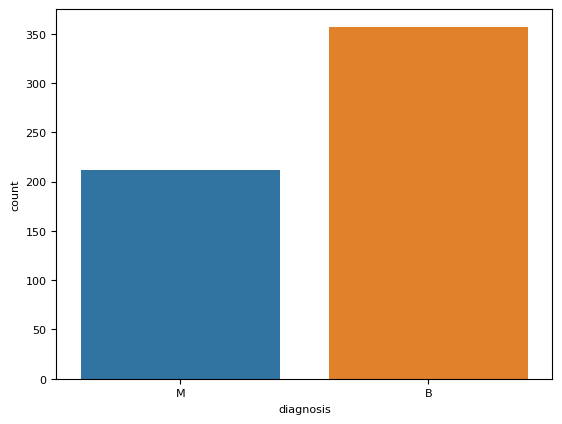

In [ ]:
sns.countplot(x=df.diagnosis)
#M = malignant (cancerous), B = benign(non Cancerous)
#A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## **Data Cleaning**

In [ ]:
df.duplicated().sum()

0

In [ ]:
len(df)

569

In [ ]:
df.corr()

<ipython-input-200-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012854,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.169389,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.021065,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.205491,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.176815,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012854,0.169389,-0.021065,0.205491,0.176815,1.000000,0.652521,0.513675,0.546865,0.552602,...,0.212253,0.035818,0.238418,0.206935,0.805428,0.468945,0.430110,0.497657,0.393256,0.499379
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.652521,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.513675,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.546865,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.552602,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
len(df)

569

## **Finding null values**

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            9
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              7
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
(df.isna().sum()/df.shape[0])*100 #perecentage of null values

diagnosis                  0.000000
radius_mean                0.000000
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  0.000000
smoothness_mean            1.581722
compactness_mean           0.000000
concavity_mean             0.000000
concave points_mean        0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.175747
radius_se                  0.000000
texture_se                 0.000000
perimeter_se               0.000000
area_se                    0.000000
smoothness_se              1.230228
compactness_se             0.000000
concavity_se               0.000000
concave points_se          0.000000
symmetry_se                0.000000
fractal_dimension_se       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0.000000
concavity_worst            0

In [ ]:
#If outliers present fill with median, else fill with mean

In [ ]:

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,560.000000,569.000000,569.000000,569.000000,569.000000,568.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096239,0.104341,0.088799,0.048919,0.181162,0.062773,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014011,0.052813,0.079720,0.038803,0.027414,0.007042,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086038,0.064920,0.029560,0.020310,0.161900,0.057697,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095865,0.092630,0.061540,0.033500,0.179200,0.061515,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105150,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: >

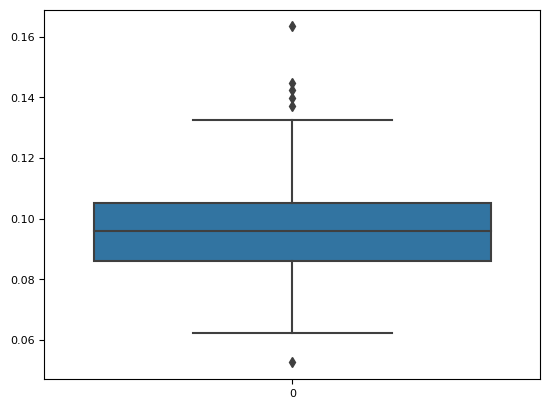

In [ ]:
sns.boxplot(df.smoothness_mean)
#When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

In [ ]:
df.smoothness_mean.median()

0.095865

In [ ]:
df.smoothness_mean.fillna(df.smoothness_mean.median(),inplace=True)

In [ ]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              7
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

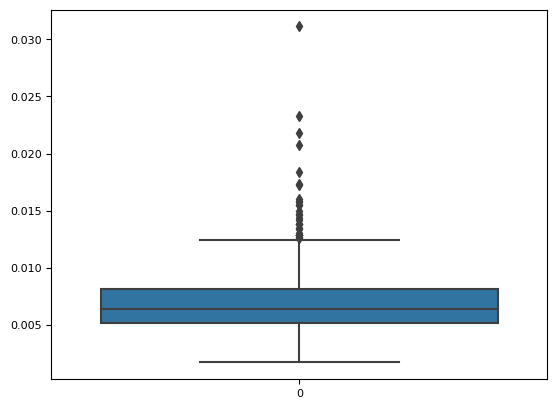

In [ ]:
sns.boxplot(df.smoothness_se)

In [ ]:
df.smoothness_se.fillna(df.smoothness_se.median(),inplace=True)

<Axes: >

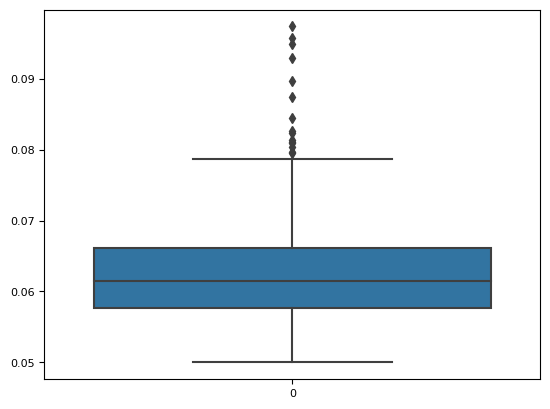

In [ ]:
sns.boxplot(df.fractal_dimension_mean)

In [ ]:
df.fractal_dimension_mean.fillna(df.fractal_dimension_mean.median(),inplace=True)

In [ ]:
#Now all the null values are removed
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.diagnosis.unique()
#we have to convert string datatype to numerical datatype

array(['M', 'B'], dtype=object)

In [ ]:
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#oh=LabelEncoder()
#df['diagnosis']=oh.fit_transform(df.diagnosis)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

In [ ]:
df.columns[1:11]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

In [ ]:
df[features_mean].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


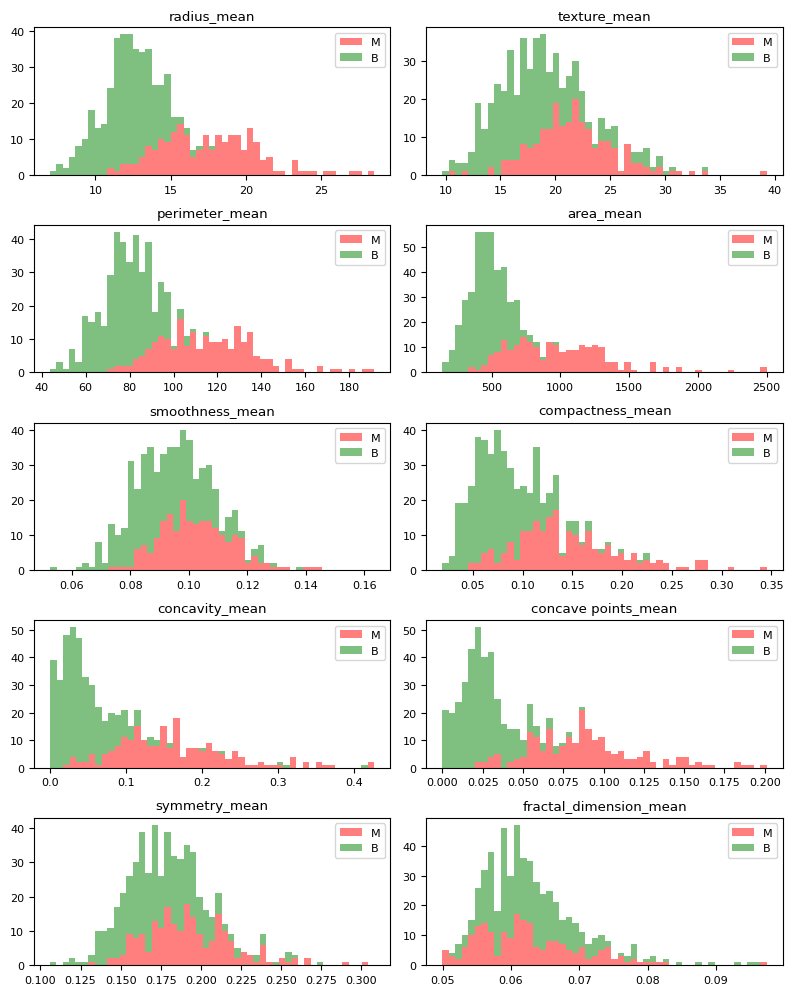

In [ ]:
#histogram
#Stack the data
#to reduce the redundancy
plt.rcParams.update({'font.size': 8}) #An instance of RcParams for handling default Matplotlib values.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10)) #multiple graphs
axes = axes.ravel() #Return a contiguous flattened array.
for idx,ax in enumerate(axes): #idx=index pos ax=grapgh
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]])+ binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()
#in histogram x-axis are intervals that show the scale of values which the measurements fall under.
#Y-axis: The Y-axis shows the number of times that the values occurred within the intervals set by the X-axis.

In [ ]:
#mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer.
#Larger values of these parameters tends to show a correlation with malignant tumors.
#mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other.
#In any of the histograms there are no noticeable large outliers that warrants further cleanup.

In [ ]:
features_mean=list(df.columns[21:31])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

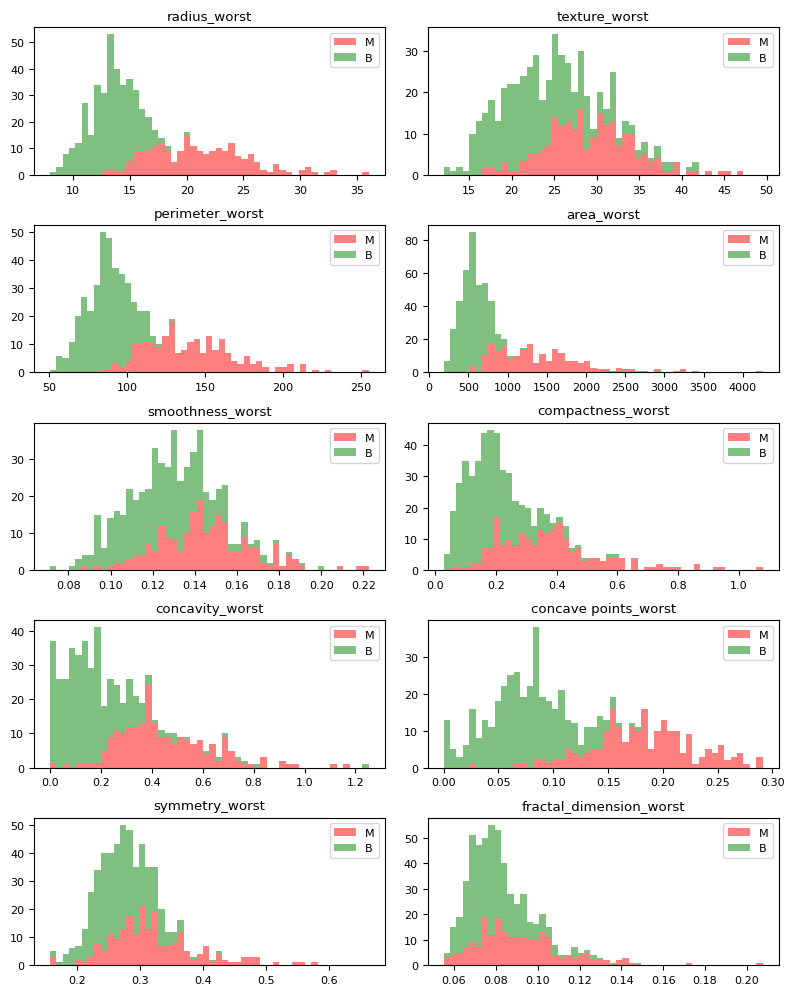

In [ ]:
plt.rcParams.update({'font.size': 8}) #An instance of RcParams for handling default Matplotlib values.
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10)) #multiple graphs
axes = axes.ravel()
for idx,ax in enumerate(axes): #idx=index pos ax=grapgh
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [ ]:
feature_cols = ['radius_worst','perimeter_worst','area_worst','concave points_worst','radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']

In [ ]:
x=df[feature_cols ]

In [ ]:
#Scaling the values

In [ ]:
#Before we create a model we need to standardize our independent features by using standard scaler method from scikit-;earn

#standardize the dataset
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [ ]:
X_scaled[0]

array([1.88668963, 2.30360062, 2.00123749, 2.29607613, 1.09706398,
       1.26993369, 0.9843749 , 3.28351467, 2.53247522])

In [ ]:
x.iloc[0]

radius_worst              25.3800
perimeter_worst          184.6000
area_worst              2019.0000
concave points_worst       0.2654
radius_mean               17.9900
perimeter_mean           122.8000
area_mean               1001.0000
compactness_mean           0.2776
concave points_mean        0.1471
Name: 0, dtype: float64

In [ ]:
y=df.diagnosis

# **Balancing the imbalanced dataset**

In [ ]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
#To balance the imbalanced data
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(random_state=51)

In [ ]:
x_re,y_re=rs.fit_resample(X_scaled,y)

In [ ]:
x_re.shape

(714, 9)

In [ ]:
y_re.shape

(714,)

In [ ]:
y_re.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=51)

In [ ]:
x_train.shape

(571, 9)

In [ ]:
y_train.shape

(571,)

In [ ]:
x.head()

,radius_worst,perimeter_worst,area_worst,concave points_worst,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean
0,25.38,184.60,2019.0,0.2654,17.99,122.80,1001.0,0.27760,0.14710
1,24.99,158.80,1956.0,0.1860,20.57,132.90,1326.0,0.07864,0.07017
2,23.57,152.50,1709.0,0.2430,19.69,130.00,1203.0,0.15990,0.12790
3,14.91,98.87,567.7,0.2575,11.42,77.58,386.1,0.28390,0.10520
4,22.54,152.20,1575.0,0.1625,20.29,135.10,1297.0,0.13280,0.10430


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## **Logistic Regression**

In [ ]:
# Based on the observations in the histogram plots, we can reasonably hypothesize that,
#the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity
#and mean concave points. We can then perform a logistic regression analysis using those features as follows:

In [ ]:
#df['radius_mean','area_mean']

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=lr.predict(x_test)

In [ ]:
pred[0:5]

array([0, 1, 1, 0, 0])

In [ ]:
y_test[0:5]

551    0
182    1
23     1
220    0
224    0
Name: diagnosis, dtype: int64

In [ ]:
print(confusion_matrix(pred,y_test))

[[73  4]
 [ 5 61]]


In [ ]:
y_test.shape

(143,)

<Axes: >

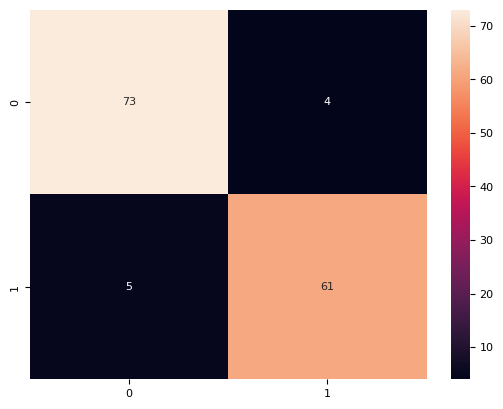

In [ ]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

In [ ]:
#Training Accuracy
lr.score(x_train,y_train)

0.9544658493870403

In [ ]:
#Testing Accuracy
lr.score(x_test,y_test)

0.9370629370629371

In [ ]:
print(accuracy_score(pred,y_test))

0.9370629370629371


In [ ]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        77
           1       0.94      0.92      0.93        66

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



## **Desision Tree Algorithm**

In [ ]:
#optimizing the tree
clf = DecisionTreeClassifier(criterion = "entropy",
                                        splitter = "random",
                                        max_depth = 10,
                                        min_samples_split = 3,
                                        min_samples_leaf = 6,
                                        max_features = 5,
                                       random_state=200)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=5,
                       min_samples_leaf=6, min_samples_split=3,
                       random_state=200, splitter='random')

In [ ]:
clf=clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred[0:5]

array([0, 1, 1, 0, 0])

In [ ]:
y_test[0:5]

551    0
182    1
23     1
220    0
224    0
Name: diagnosis, dtype: int64

In [ ]:
clf.score(x_train,y_train) #training Accuracy

0.9492119089316988

In [ ]:
clf.score(x_test,y_test) #TESTING Accuracy

0.916083916083916

In [ ]:
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.916083916083916


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        76
           1       0.92      0.90      0.91        67

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



## **Random Forest**

In [ ]:
#create a classifier
#Now is time to create our random forest classifier and then train it on train set.
#We will also pass the number of trees(100) in the forest we want to use through the parameter called n_estimators.

classifier= RandomForestClassifier(n_estimators=500,
                                    max_depth=3,
                                    min_samples_leaf=5,
                                    max_features=5) #hyperparameter

#Train the model using training sets
classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, min_samples_leaf=5,
                       n_estimators=500)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9300699300699301


In [ ]:
classifier.score(x_train,y_train) #training Accuracy

0.9649737302977233

In [ ]:
classifier.score(x_test,y_test) #TEST Accuracy

0.9300699300699301

<Axes: >

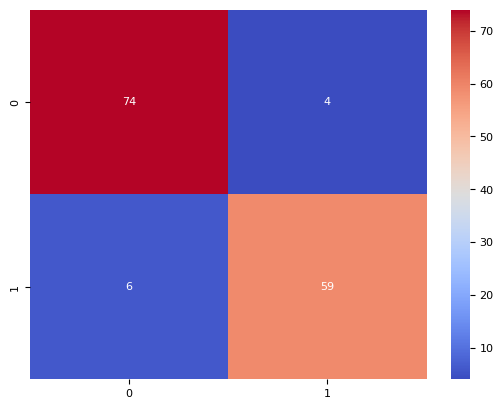

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),yticklabels=True,cmap='coolwarm',annot=True)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        78
           1       0.94      0.91      0.92        65

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9300699300699301
